# Speed Up Exploratory Data Analysis with the klib Python library

<a href="https://www.youtube.com/watch?v=URjJVEeZxxU&list=PLtqF5YXg7GLn0WWB_wQx7wHrIvbs0EH2e&index=47">Source</a>

<a href="https://drive.google.com/file/d/14QJXlvgdckreCFPMCyhGzR63zp88WbtU/view?usp=sharing">Download Dataset</a>

# **Install klib**

In [ ]:
! pip install klib

# **Importing the Relevant Libraries & Dataset**

    - National Football League (NFL) Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import klib
import pandas as pd

df = pd.read_csv('NFL_DATASET.csv')

df.head()

Unnamed: 0  qtr  down   time  TimeUnder  PlayTimeDiff  yrdln  ydstogo  \
0           0    3   2.0  08:54          9          37.0   36.0        5   
1           1    3   1.0  12:48         13          15.0   32.0       10   
2           2    4   4.0  04:07          5           5.0   42.0       11   
3           3    2   1.0  06:49          7           0.0   20.0       10   
4           4    2   NaN  02:00          2          28.0   27.0        0   

   ydsnet  GoalToGo  ...    airEPA    yacEPA Home_WP_pre Away_WP_pre  \
0      17       0.0  ...       NaN       NaN    0.138939    0.861061   
1       4       0.0  ...       NaN       NaN    0.272768    0.727232   
2      -1       0.0  ...       NaN       NaN    0.047530    0.952470   
3      48       0.0  ...  0.640774  2.464259    0.999998    0.000002   
4      22       0.0  ...       NaN       NaN         NaN         NaN   

   Home_WP_post  Away_WP_post  Win_Prob       WPA        airWPA    yacWPA  
0      0.126569      0.873431  0.138939 -0.012370           NaN       NaN  
1      0.277266      0.722734  0.727232 -0.004498           NaN       NaN  
2      0.044235      0.955765  0.952470  0.003295           NaN       NaN  
3      0.999989      0.000011  0.000002  0.000010  7.889122e-07  0.000009  
4           NaN           NaN       NaN       NaN           NaN       NaN  

[5 rows x 67 columns]

# **Missing Values Plot**

Here we can examine the data quality. In other words, how clean is the dataset?

***missingval_plot()*** - provides a high-level overview of the missing values in a dataset. It pinpoints which columns and rows to examine in more detail.

**Top** portion of the plot shows the aggregate for each column. Summary statistics is displayed on the right most side.

**Bottom** portion of the plot shows the missing values (black colors) in the DataFrame.

GridSpec(6, 6)

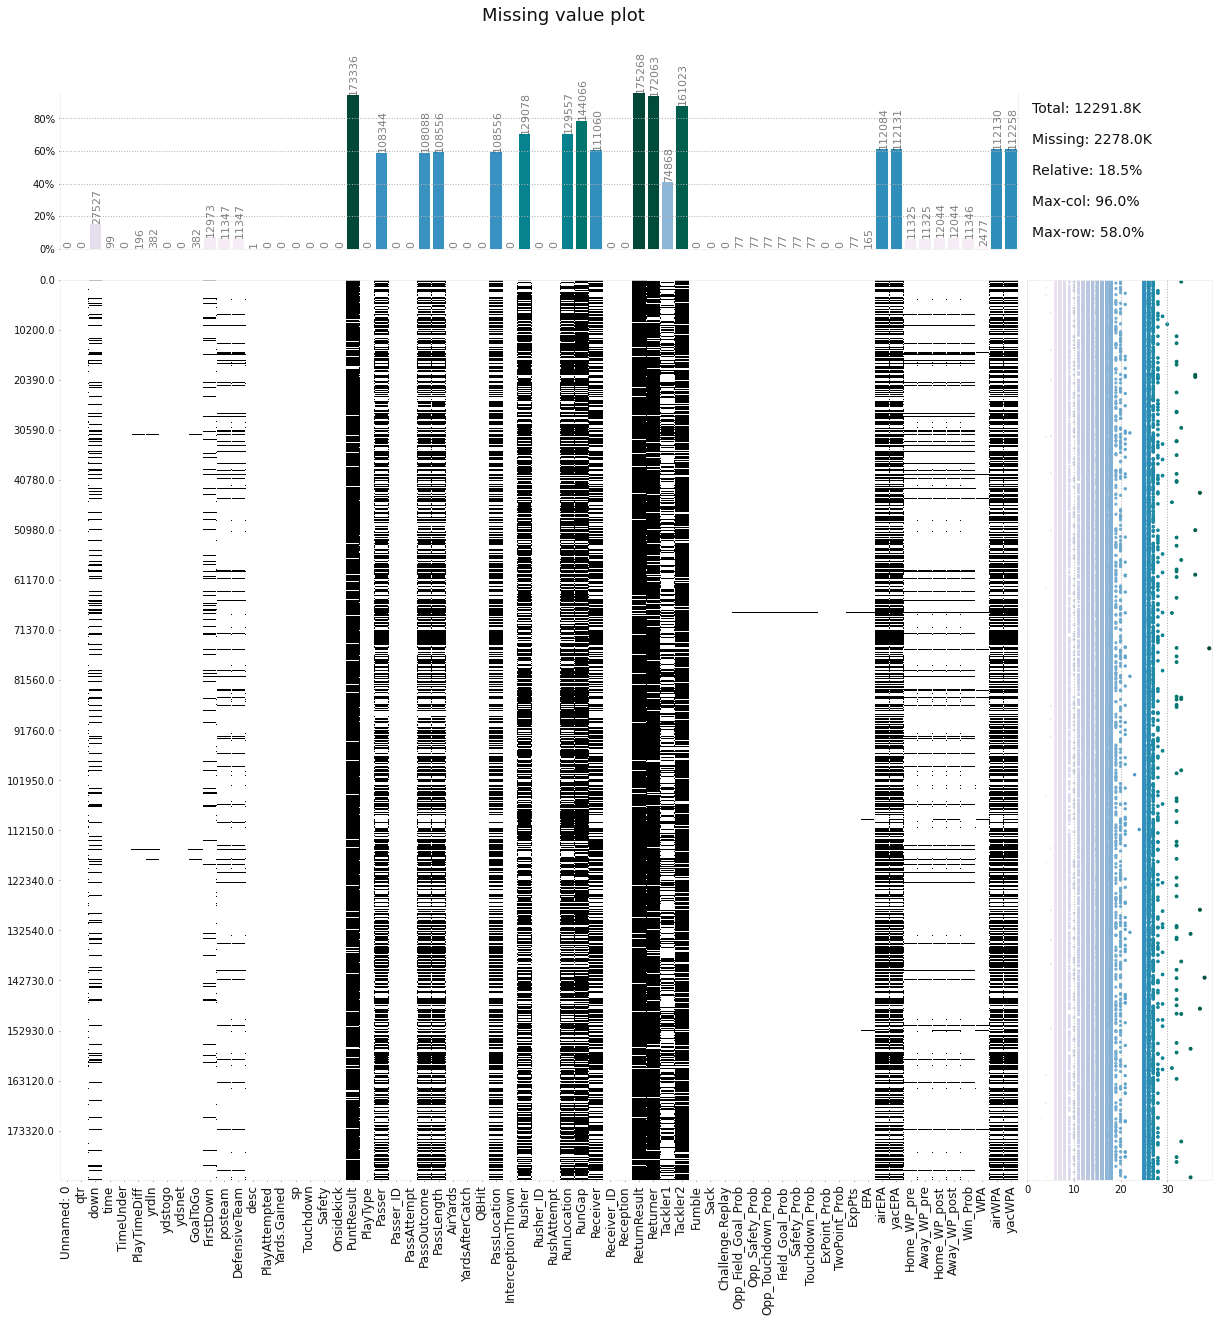

In [3]:
klib.missingval_plot(df)

# **Data Cleaning**

The ***data_cleaning()*** function essentially drops empty and single valued columns as well as empty and duplicate rows.

In [4]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (183460, 63)Remaining NAs: 1757318

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 4
     of which 1 single valued.     Columns: ['play_attempted']
Dropped missing values: 520667
Reduced memory by at least: 60.43 MB (-64.44%)



# **Correlation Plot**

Here, we can examine the intercorrelation amongst the features.

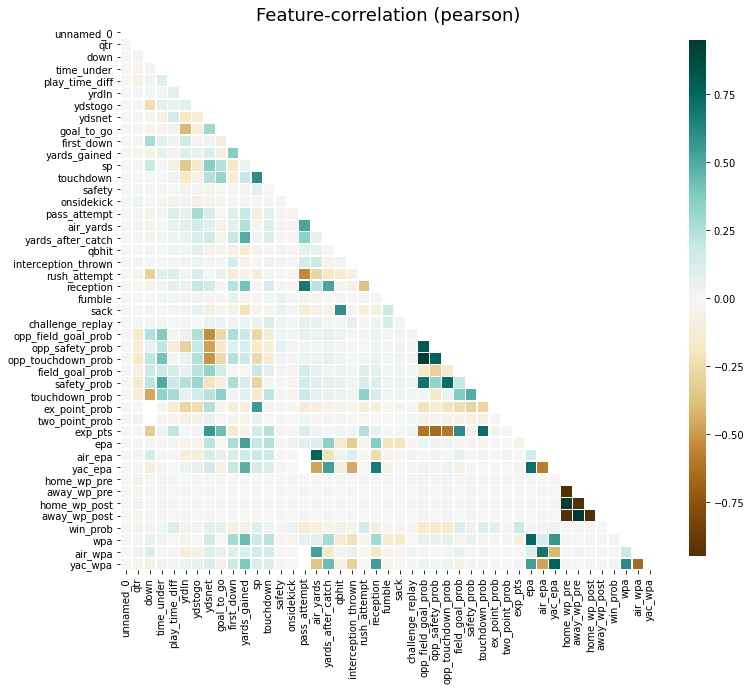

In [5]:
klib.corr_plot(df_cleaned, annot=False)

### Display only Positive Correlation

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


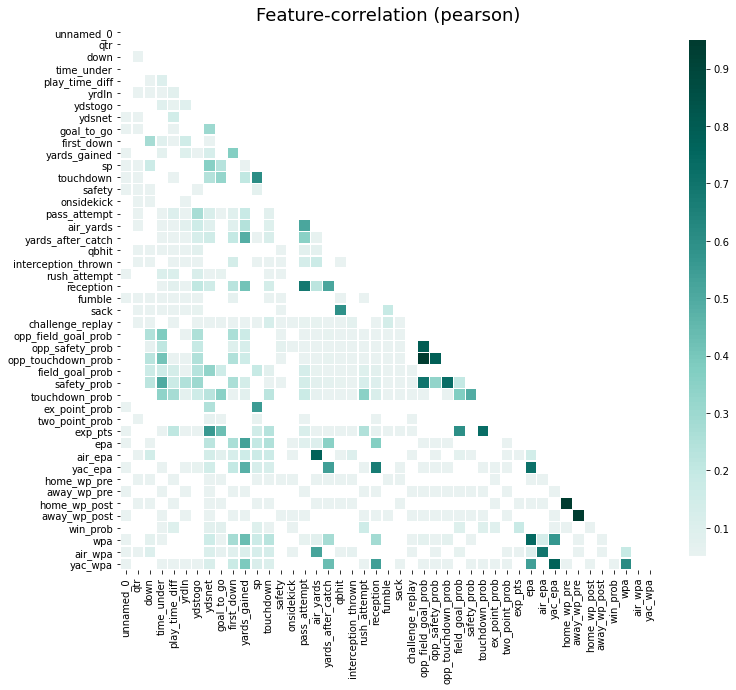

In [6]:
klib.corr_plot(df_cleaned, split='pos', annot=False)

### Display only Negative Correlation.

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


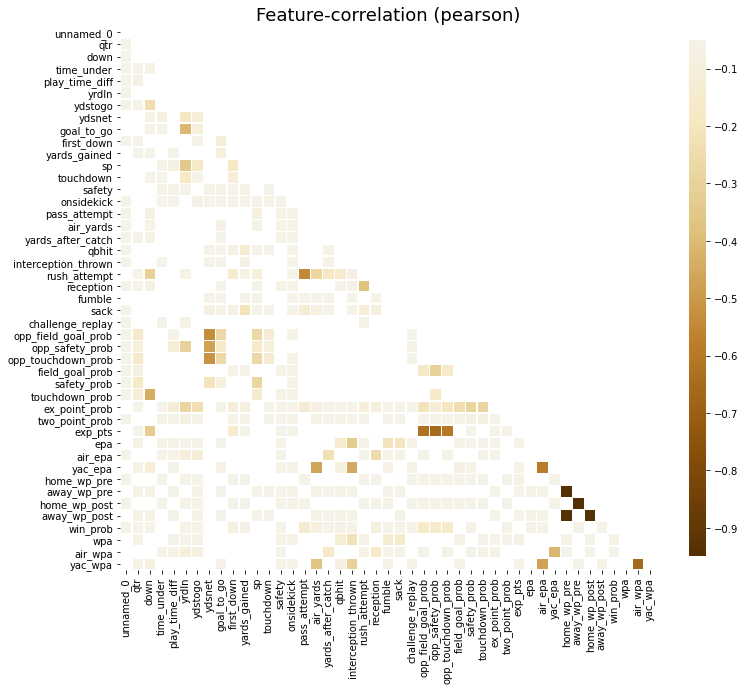

In [7]:
klib.corr_plot(df_cleaned, split='neg', annot=False)

### Display Correlation with a target variable of interest

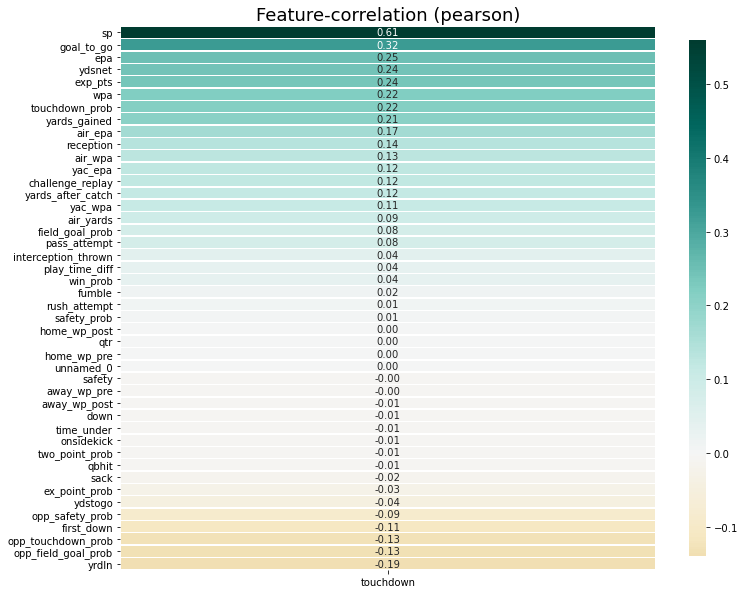

In [8]:
klib.corr_plot(df_cleaned, target='touchdown')

### Correlation data matrix

In [9]:
klib.corr_mat(df_cleaned)

# **Distribution Plot**

Displays the distribution plot for columns of interest.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


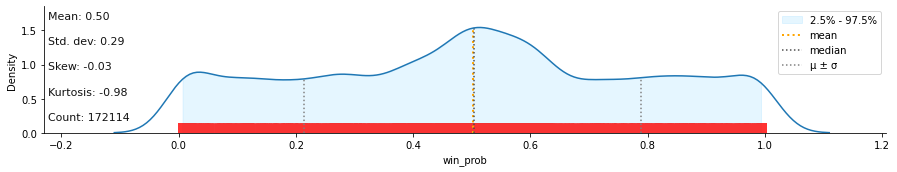

In [10]:
x = df_cleaned['win_prob']

klib.dist_plot(x)

# **Categorical Plot**

GridSpec(6, 21)

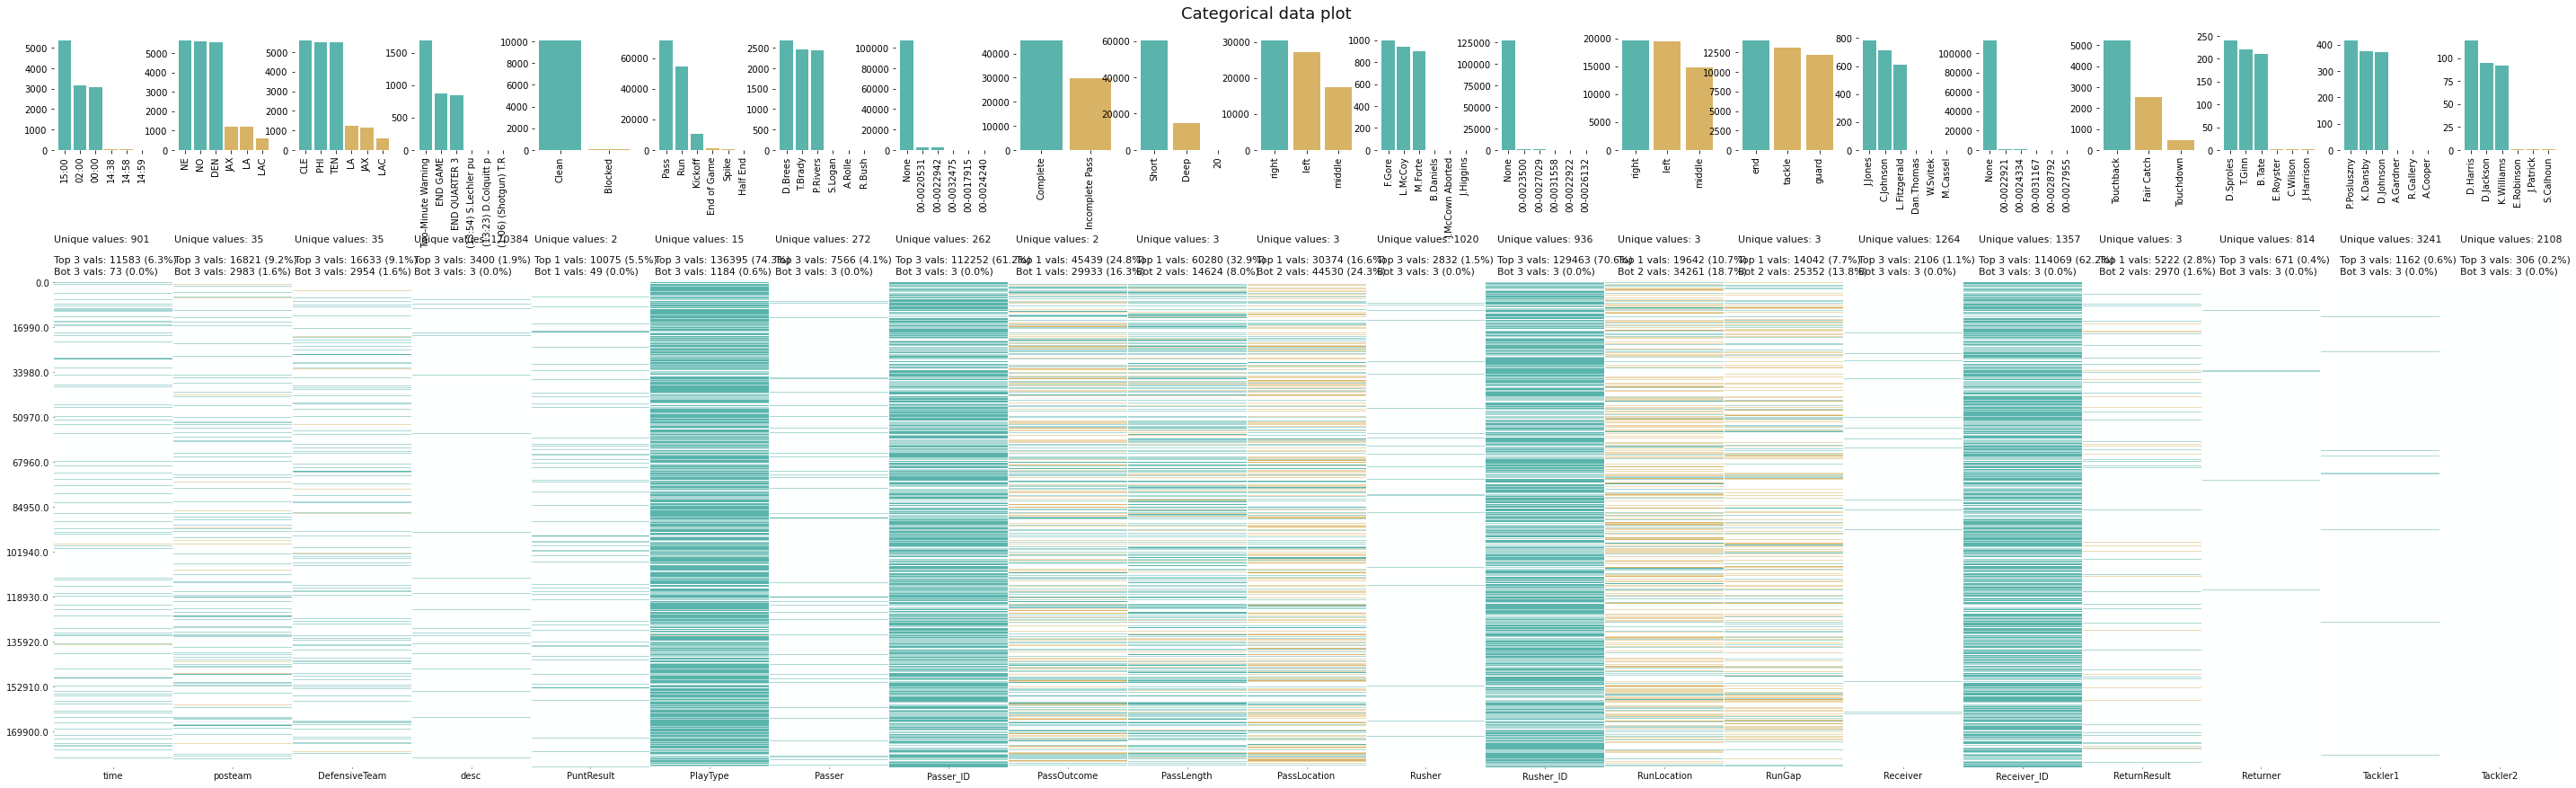

In [11]:
klib.cat_plot(df, figsize=(50,15))

# **Save Plot as a PDF file**

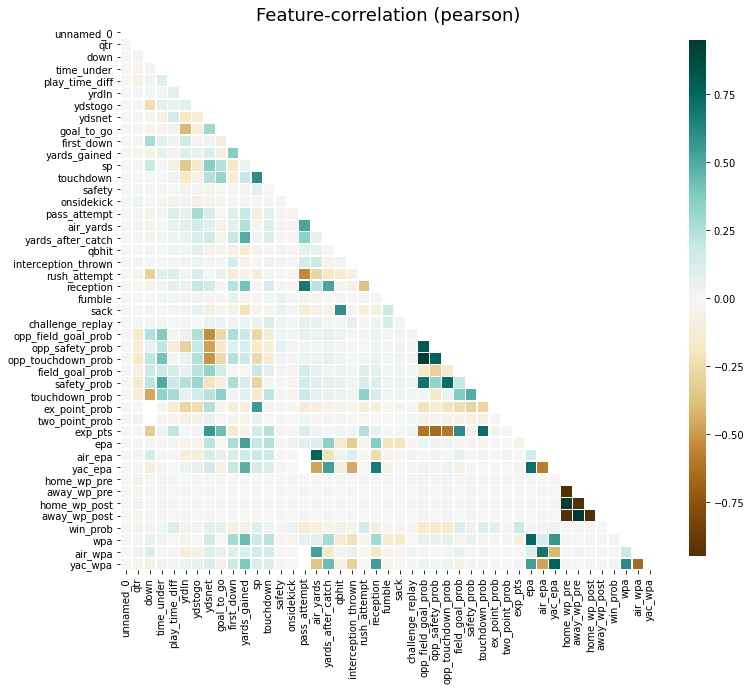

In [12]:
plot = klib.corr_plot(df_cleaned, annot=False, figsize=(12,10))

plot.figure.savefig('figure.pdf')